# Make left and right masks 

In [80]:
from nibabel import save as nbsave, load as nbload, Nifti1Image

from matplotlib import pyplot as plt
%matplotlib inline

subject = 'ANfs'
gm_mask_nifti1 = nbload('../database/'+subject+'/gm_mask_funcref.nii')
gm_mask = gm_mask_nifti1.get_data()

In [138]:
split_ix = 48

gm_mask_left = gm_mask.copy()
gm_mask_left[split_ix:,:,:] = False

gm_mask_right = gm_mask.copy()
gm_mask_right[:split_ix,:,:] = False

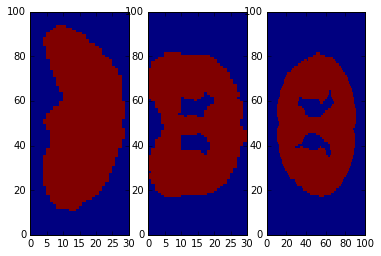

In [133]:
fig, ax = plt.subplots(1,3);
ax[0].pcolormesh(gm_mask[50,:,:]);
ax[1].pcolormesh(gm_mask[:,50,:]);
ax[2].pcolormesh(gm_mask[:,:,15]);

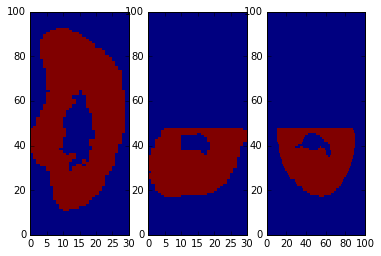

In [140]:
fig, ax = plt.subplots(1,3);
ax[0].pcolormesh(gm_mask_left[40,:,:]);
ax[1].pcolormesh(gm_mask_left[:,50,:]);
ax[2].pcolormesh(gm_mask_left[:,:,15]);

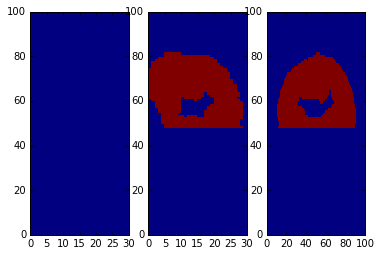

In [142]:
fig, ax = plt.subplots(1,3);
ax[0].pcolormesh(gm_mask_right[40,:,:]);
ax[1].pcolormesh(gm_mask_right[:,50,:]);
ax[2].pcolormesh(gm_mask_right[:,:,15]);

In [143]:
nbsave(Nifti1Image(gm_mask_left, gm_mask_nifti1.affine), '../database/'+subject+'/gm_mask_left.nii')
nbsave(Nifti1Image(gm_mask_right, gm_mask_nifti1.affine), '../database/'+subject+'/gm_mask_right.nii')

# Make stimulation directory for Storm

In [84]:
training_data = nbload('../database/SSfs_auto2/wmd_train/20150715SS_rest_5.nii')
print training_data.shape

In [87]:
def volume_to_binary (volume):
    volume = np.concatenate([volume, np.zeros((100,100,6))], axis=2)

    nrows=6
    ncols=6
    mosaic = np.empty((100*nrows, 100*ncols))

    for i in xrange(ncols*nrows):
        row, col = divmod(i, ncols)
        mosaic[row*100:(row+1)*100,col*100:(col+1)*100] = volume[:,:,i].T

    return mosaic.flatten(order='C').astype(np.uint16).tostring()

In [98]:
for i in range(training_data.shape[-1]):
    with open('../benchmark_data/SSfs_auto2/%0.12i.PixelData'%i, 'w') as f:
        f.write(volume_to_binary(training_data.get_data()[...,i]))